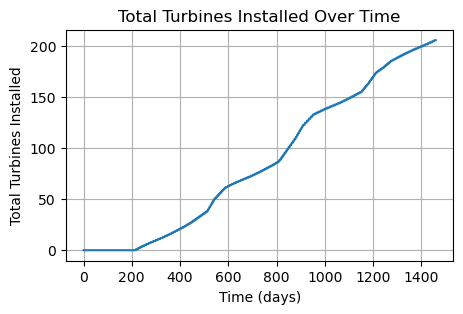

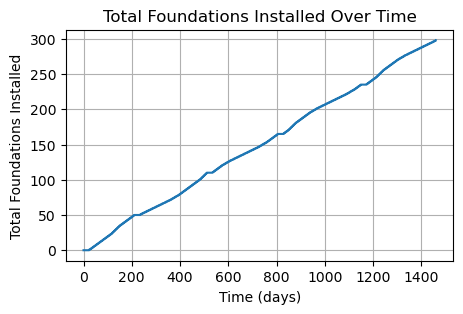

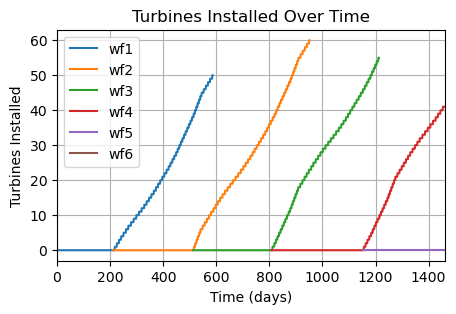

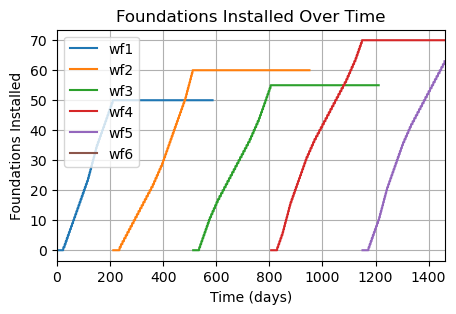

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt


class Vessels:
  def __init__(self, vessel_type, name, position):
    self.status = "available"
    self.vessel_type = vessel_type
    self.name = name
    self.position = position
    self.speed = 10  #km/h


class WindFarm:
    def __init__(self, name, position, n_turb):
        self.status = "available"
        self.name = name
        self.position = position
        self.n_turb = n_turb
        self.start_date = None
        self.turbines_installed = 0
        self.foundations_installed = 0


def get_month(time):
    months = [
        "January", "February", "March", "April",
        "May", "June", "July", "August",
        "September", "October", "November", "December"
    ]
    
    days_per_month = [
        31, 28, 31, 30,
        31, 30, 31, 31,
        30, 31, 30, 31
    ]
    
    total_days = sum(days_per_month)
    current_day = time % total_days
    
    month_index = 0
    while current_day >= days_per_month[month_index]:
        current_day -= days_per_month[month_index]
        month_index += 1
    
    return months[month_index]



def calculate_construction_time(month):
    construction_time = {
        "January": {"turbine_construction_time": 7, "foundation_construction_time": 4},
        "February": {"turbine_construction_time": 6.5, "foundation_construction_time": 3},
        "March": {"turbine_construction_time": 6, "foundation_construction_time": 3},
        "April": {"turbine_construction_time": 5, "foundation_construction_time": 2.5},
        "May": {"turbine_construction_time": 4.5, "foundation_construction_time": 2},
        "June": {"turbine_construction_time": 4, "foundation_construction_time": 2.5},
        "July": {"turbine_construction_time": 6.6, "foundation_construction_time": 3},
        "August": {"turbine_construction_time": 7, "foundation_construction_time": 4},
        "September": {"turbine_construction_time": 8, "foundation_construction_time": 4.5},
        "October": {"turbine_construction_time": 8.5, "foundation_construction_time": 5},
        "November": {"turbine_construction_time": 8.5, "foundation_construction_time": 5},
        "December": {"turbine_construction_time": 8, "foundation_construction_time": 4.5}
    }

    return construction_time[month]


def allocation_vessels(vessels, wind_farms, allocation):
    for wind_farm in wind_farms:

        hlv_vessel = allocate_vessel(vessels, wind_farm, "HLV")
        juv_vessel = allocate_vessel(vessels, wind_farm, "JUV")

        if wind_farm.status == "available" and hlv_vessel is not None:
            if juv_vessel is not None:
              allocation.append({
                "wind_farm": wind_farm,
                "hlv_vessel": hlv_vessel,
                "juv_vessel": juv_vessel,
                "foundation_duration": 0,
                "turbine_duration": 0,
                "project_turbines_installed": 0
              })
              hlv_vessel.status = "not available"
              juv_vessel.status = "not available"
              wind_farm.status = "under construction"
              wind_farm.start_date = time
              break

            elif juv_vessel is None:
              allocation.append({
                "wind_farm": wind_farm,
                "hlv_vessel": hlv_vessel,
                "juv_vessel": None,
                "foundation_duration": 0,
                "turbine_duration": 0,
                "project_turbines_installed": 0
              })
              hlv_vessel.status = "not available"
              wind_farm.status = "under construction"
              wind_farm.start_date = time
              break

    for project in allocation:
        if juv_vessel is not None and project["juv_vessel"] is None:
              project["juv_vessel"] = juv_vessel
              juv_vessel.status = "not available"
              break

    return allocation


def allocate_vessel(vessels, wind_farm, vessel_type):
    for vessel in vessels:
        if vessel.status == "available" and vessel.vessel_type == vessel_type:
            return vessel
    return None


def construction_3(project, allocation, total_turbines_installed, total_foundations_installed, turbine_construction_time, foundation_construction_time):

    project_duration = time - project["wind_farm"].start_date

    if project_duration >= mobilization_duration:  # The construction cannot start before the mobilization ended.

        if project["project_turbines_installed"] >= project["wind_farm"].n_turb:
            project["wind_farm"].status = "complete"
            project["juv_vessel"].status = "available"
            allocation.remove(project)

        else:
            if (project["wind_farm"].foundations_installed >= project["wind_farm"].n_turb) and (project["juv_vessel"] is not None):
                if project["hlv_vessel"] is not None:
                  project["hlv_vessel"].status = "available"
                  project["hlv_vessel"] = None

                if project["turbine_duration"] >= turbine_construction_time:
                    project["project_turbines_installed"] += 1
                    total_turbines_installed += 1
                    project["turbine_duration"] = 0
                else:
                    project["turbine_duration"] += 1

            elif project["foundation_duration"] >= foundation_construction_time:
                project["wind_farm"].foundations_installed += 1
                total_foundations_installed += 1
                project["foundation_duration"] = 0

            else:
                project["foundation_duration"] += 1

    return project, total_turbines_installed, total_foundations_installed, allocation


def plot_graphs(time_values, turbine_installed_values, foundation_installed_values, wind_farm_data):
    # Plotting the total number of turbines installed over time
    plt.figure(figsize=(5, 3))
    plt.plot(time_values, turbine_installed_values)
    plt.xlabel("Time (days)")
    plt.ylabel("Total Turbines Installed")
    plt.title("Total Turbines Installed Over Time")
    plt.grid(True)
    plt.show()

    # Plotting the total number of foundations installed over time
    plt.figure(figsize=(5, 3))
    plt.plot(time_values, foundation_installed_values)
    plt.xlabel("Time (days)")
    plt.ylabel("Total Foundations Installed")
    plt.title("Total Foundations Installed Over Time")
    plt.grid(True)
    plt.show()

    # Plotting the evolution of the number of turbines installed for each wind farm over time
    plt.figure(figsize=(5, 3))
    for wind_farm, data in wind_farm_data.items():
        plt.plot(data["time_values"], data["turbine_installed_values"], label=wind_farm.name)
    plt.xlabel("Time (days)")
    plt.ylabel("Turbines Installed")
    plt.title("Turbines Installed Over Time")
    plt.legend()
    plt.grid(True)
    plt.xlim(0, modelisation_duration)
    plt.show()

    # Plotting the evolution of the number of foundations installed for each wind farm over time
    plt.figure(figsize=(5, 3))
    for wind_farm, data in wind_farm_data.items():
        plt.plot(data["time_values"], data["foundation_installed_values"], label=wind_farm.name)
    plt.xlabel("Time (days)")
    plt.ylabel("Foundations Installed")
    plt.title("Foundations Installed Over Time")
    plt.legend()
    plt.grid(True)
    plt.xlim(0, modelisation_duration)
    plt.show()


vessel1 = Vessels(name = "v1", vessel_type = "HLV", position=(0, 0))
vessel2 = Vessels(name = "v2", vessel_type = "HLV", position=(10, 10))
vessel3 = Vessels(name = "v3", vessel_type = "JUV", position=(10, 15))
vessel4 = Vessels(name = "v4", vessel_type = "JUV", position=(10, 20))
vessel5 = Vessels(name = "v5", vessel_type = "JUV", position=(30, 80))

vessels = [vessel1, vessel3, vessel4, vessel5]

wind_farm1 = WindFarm(name="wf1", position=(5, 5), n_turb=50)
wind_farm2 = WindFarm(name="wf2", position=(20, 200), n_turb=60)
wind_farm3 = WindFarm(name="wf3", position=(15, 150), n_turb=55)
wind_farm4 = WindFarm(name="wf4", position=(160, 12), n_turb=70)
wind_farm5 = WindFarm(name="wf5", position=(160, 40), n_turb=67)
wind_farm6 = WindFarm(name="wf6", position=(80, 300), n_turb=73)

wind_farms = [wind_farm1, wind_farm2, wind_farm3, wind_farm4, wind_farm5, wind_farm6]


modelisation_duration = 365 * 4
mobilization_duration = 20   # Time required to move the vessel to the WF, to equip it, change teams, etc.

time = 0
total_turbines_installed = 0
total_foundations_installed = 0
allocation_results = []

time_values = []
turbine_installed_values = []
foundation_installed_values = []

# Create a dictionary to store the turbine and foundation installation data for each wind farm
wind_farm_data = {wind_farm: {"time_values": [], "turbine_installed_values": [], "foundation_installed_values": []} for wind_farm in wind_farms}

while time <= modelisation_duration:
    allocation_results = allocation_vessels(vessels, wind_farms, allocation_results)

    for project in allocation_results:
        month = get_month(time)
        construction_times = calculate_construction_time(month)
        turbine_construction_time = construction_times["turbine_construction_time"] 
        foundation_construction_time = construction_times["foundation_construction_time"] 

        project, total_turbines_installed, total_foundations_installed, allocation_results = construction_3(
            project,
            allocation_results,
            total_turbines_installed,
            total_foundations_installed,
            turbine_construction_time,
            foundation_construction_time
        )

        wind_farm_data[project["wind_farm"]]["time_values"].append(time)
        wind_farm_data[project["wind_farm"]]["turbine_installed_values"].append(project["project_turbines_installed"])
        wind_farm_data[project["wind_farm"]]["foundation_installed_values"].append(project["wind_farm"].foundations_installed)

    time_values.append(time)
    turbine_installed_values.append(total_turbines_installed)
    foundation_installed_values.append(total_foundations_installed)

    time += 1

#Plot the turbines installed in total and per WF for each day :

plot_graphs(time_values, turbine_installed_values, foundation_installed_values, wind_farm_data)


